In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from tabulate import tabulate
data = pd.read_csv('Engineering Student Count Details (College wise - Branch wise).csv')
data['Zone'] = data['Zone'].fillna(method='ffill')
data['Group'] = data['Group'].fillna(method='ffill')
data['University'] = data['University'].fillna(method='ffill')
data = data[(data['Category Name'] != 'Architecture') & (data['Category Name'] != 'Affiliated Autonomous') & (data['Category Name'] != 'Affilated Autonomous')]


In [133]:
one_a_data = data.copy()
del one_a_data['branch']
one_a_data = one_a_data.groupby(['College Code','College Name','Zone','Group','Category Name','University','District']).agg({'1st year':'sum', 'Total No of students': 'sum'}).reset_index()
#one_a_data.to_csv('zone_college.csv', index=True)
one_a_data = one_a_data.groupby('Zone').agg({'College Code': 'count', '1st year':'sum', 'Total No of students': 'sum'}).reset_index()
one_a_data = one_a_data.rename(columns={'College Code': 'Number of Colleges'})
print("\033[1mNumber of colleges in zone wise with Total No of students and total 1st year students\033[0m")
one_a_data

Number of colleges in zone wise with Total No of students and total 1st year students


,Zone,Number of Colleges,1st year,Total No of students
0,Zone I : Chennai-I,22,4767,17951
1,Zone II : Chennai-II,19,5101,19402
2,Zone III : Chennai-III,16,4575,16203
3,Zone IV : MIT - Chromepet,17,3338,12495
4,Zone IX : Coimbatore - I,25,5968,22282
5,Zone V : Tindivanam,13,2544,8284
6,Zone VI : Arni,18,2661,10403
7,Zone VII : Dharmapuri,16,4240,14760
8,Zone VIII : Salem,26,7577,23664
9,Zone X : Coimbatore - II,16,4285,20872


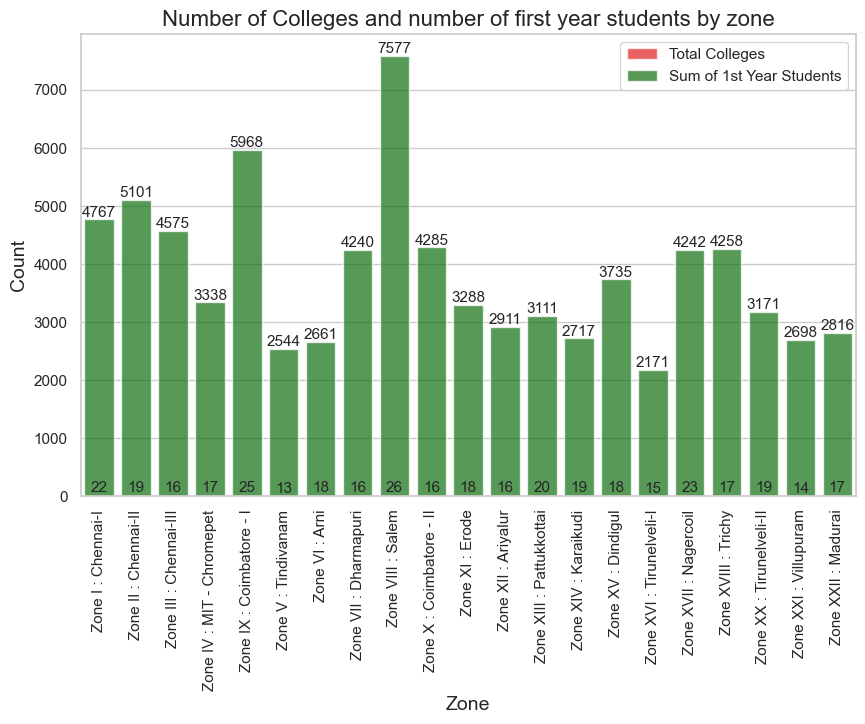

In [134]:
sns.set(style = 'whitegrid')
fig, ax = plt.subplots(figsize = (10,6))

sns.barplot(x='Zone', y='Number of Colleges', data = one_a_data, color = 'red', alpha = 0.7, label = 'Total Colleges')
sns.barplot(x='Zone', y='1st year', data = one_a_data, color = 'green', alpha = 0.7, label = 'Sum of 1st Year Students')

ax.set_xlabel('Zone', fontsize = 14)
ax.set_ylabel('Count', fontsize = 14)
ax.set_title('Number of Colleges and number of first year students by zone', fontsize = 16)
plt.xticks(rotation = 90)
plt.legend(loc = 'upper right')

for i, bar in enumerate(ax.containers):
    ax.bar_label(bar, label_type = 'edge', labels = one_a_data.iloc[:, i+1], fontsize = 11)
plt.show()

In [135]:

data.loc[data['branch'].isnull(), 'branch'] = 'Others'
data.loc[:, 'Disciplines'] = 'OTHER'


data.loc[data['branch'].str.contains('computer', case = False), 'Disciplines'] = 'CS'
data.loc[data['branch'].str.contains('Artificial Intelligence', case = False), 'Disciplines'] = 'CS'
data.loc[data['branch'].str.contains('Data Science', case = False), 'Disciplines'] = 'CS'
data.loc[data['branch'].str.contains('Cyber', case = False), 'Disciplines'] = 'CS'

data.loc[data['branch'].str.contains('information', case = False), 'Disciplines'] = 'IT'

data.loc[data['branch'].str.contains('mech', case = False), 'Disciplines'] = 'MECH'
data.loc[data['branch'].str.contains('auto', case = False), 'Disciplines'] = 'MECH'

data.loc[data['branch'].str.contains('communication', case = False), 'Disciplines'] = 'ECE'
data.loc[data['branch'].str.contains('electronics', case = False), 'Disciplines'] = 'ECE'

data.loc[data['branch'].str.contains('electrical', case = False), 'Disciplines'] = 'EEE'

data.loc[data['branch'].str.contains('civil', case = False), 'Disciplines'] = 'CIVIL'

#data.to_csv('main.csv', index = False)

In [136]:
# pivot the data to create a stacked bar chart
two_b_data = data.groupby(['College Name', 'Zone', 'Disciplines']).agg({'1st year':'sum'}).reset_index()
pivot_data = two_b_data.pivot(index='College Name', columns='Disciplines', values='1st year')

# Define a function to update the chart based on the selected zone
def update_chart(zone_name):
    zone_data = two_b_data.loc[two_b_data['Zone'] == zone_name]
    pivot_data = zone_data.pivot(index='College Name', columns='Disciplines', values='1st year')
    
    # Define custom data for each trace
    cs_branches = []
    other_branches = []
    eee_branches = []
    ece_branches = []
    it_branches = []
    mech_branches = []
    civil_branches = []
    for college in pivot_data.index:
        filtered_df = data[(data['College Name'] == college) & (data['Zone'] == zone_name)]
        cs_branches_str = '<br>'.join(filtered_df[filtered_df['Disciplines'] == 'CS']['branch'].unique())
        other_branches_str = '<br>'.join(filtered_df[filtered_df['Disciplines'] == 'OTHER']['branch'].unique())
        eee_branches_str = '<br>'.join(filtered_df[filtered_df['Disciplines'] == 'EEE']['branch'].unique())
        ece_branches_str = '<br>'.join(filtered_df[filtered_df['Disciplines'] == 'ECE']['branch'].unique())
        it_branches_str = '<br>'.join(filtered_df[filtered_df['Disciplines'] == 'IT']['branch'].unique())
        mech_branches_str = '<br>'.join(filtered_df[filtered_df['Disciplines'] == 'MECH']['branch'].unique())
        civil_branches_str = '<br>'.join(filtered_df[filtered_df['Disciplines'] == 'CIVIL']['branch'].unique())
        cs_branches.append(cs_branches_str)
        other_branches.append(other_branches_str)
        eee_branches.append(eee_branches_str)
        ece_branches.append(ece_branches_str)
        it_branches.append(it_branches_str)
        mech_branches.append(mech_branches_str)
        civil_branches.append(civil_branches_str)
    
    
    first_yr_count = data.groupby('College Name')['1st year'].sum().reset_index()
    
    # Create the bar chart with custom data for each trace
    fig = go.Figure(data=[
        go.Bar(name='Computer Science', x=pivot_data.index, y=pivot_data['CS'],
               customdata=cs_branches,
               hovertemplate='<b>%{x}</b><br>%{y} 1st year CS students<br>%{customdata}<extra></extra>'),
        go.Bar(name='Mechanical Engineering', x=pivot_data.index, y=pivot_data['MECH'],
              customdata=mech_branches,
               hovertemplate='<b>%{x}</b><br>%{y} 1st year MECH students<br>%{customdata}<extra></extra>'),
        go.Bar(name='Electrical Engineering', x=pivot_data.index, y=pivot_data['EEE'],
              customdata=eee_branches,
               hovertemplate='<b>%{x}</b><br>%{y} 1st year EEE students<br>%{customdata}<extra></extra>'),
        go.Bar(name='Information Technology', x=pivot_data.index, y=pivot_data['IT'],
              customdata=it_branches,
               hovertemplate='<b>%{x}</b><br>%{y} 1st year IT students<br>%{customdata}<extra></extra>'),
        go.Bar(name='Electronics and Engineering', x=pivot_data.index, y=pivot_data['ECE'],
              customdata=ece_branches,
               hovertemplate='<b>%{x}</b><br>%{y} 1st year ECE students<br>%{customdata}<extra></extra>'),
        go.Bar(name='Civil Engineering', x=pivot_data.index, y=pivot_data['CIVIL'],
              customdata=civil_branches,
               hovertemplate='<b>%{x}</b><br>%{y} 1st year CIVIL students<br>%{customdata}<extra></extra>'),
        go.Bar(name='Other', x=pivot_data.index, y=pivot_data['OTHER'],
               customdata=other_branches,
               hovertemplate='<b>%{x}</b><br>%{y} 1st year OTHER students<br>%{customdata}<extra></extra>')
    ])
    
    
    for i, college in enumerate(pivot_data.index):
        count = first_yr_count[first_yr_count['College Name'] == college]['1st year'].values[0]
        fig.add_annotation(
            x=college,
            y=pivot_data.sum(axis=1)[i] + 10, # Adjust the position of the annotation
            text=str(count),
            showarrow=False,
            font=dict(size=12)
        )
    
    fig.update_layout(
        barmode='stack', 
        title='Total Number of 1st year Students by Department and College for Zone ' + zone_name,
        xaxis_title='College Name', 
        yaxis_title='Number of 1st year Students', 
        xaxis_tickangle=-90,
        height=1000,
        width=1000
    )

    fig.show()

In [137]:
two_c_data = data.groupby(['Zone', 'Disciplines']).agg({'Total No of students':'sum', '1st year':'sum'}).reset_index()
# Define a function to update the histogram based on the selected zone
def update_histogram(zone):
    # Filter the data by the selected zone
    zone_data = two_c_data[two_c_data['Zone'] == zone]
    
    # Group the data by discipline and sum the total number of students
    discipline_data = zone_data.groupby('Disciplines')['Total No of students'].sum()
    
    # Create a bar plot with the number of students on the y-axis and the discipline on the x-axis
    plt.bar(discipline_data.index, discipline_data.values)
    
    # Add labels to the plot
    plt.xlabel('Discipline')
    plt.ylabel('Number of Students')
    plt.title(f'Number of Students in Each Discipline for Zone {zone}')
    for i, v in enumerate(discipline_data.values):
        plt.text(i, v, str(v), ha='center', va='bottom')
    # Show the plot
    plt.show()
    
def update_histogram1(zone):
    # Filter the data by the selected zone
    zone_data = two_c_data[two_c_data['Zone'] == zone]
    
    # Group the data by discipline and sum the total number of students
    discipline_data = zone_data.groupby('Disciplines')['1st year'].sum()
    
    # Create a bar plot with the number of students on the y-axis and the discipline on the x-axis
    plt.bar(discipline_data.index, discipline_data.values)
    
    # Add labels to the plot
    plt.xlabel('Discipline')
    plt.ylabel('Number of Students')
    plt.title(f'Number of 1st year Students in Each Discipline for Zone {zone}')
    for i, v in enumerate(discipline_data.values):
        plt.text(i, v, str(v), ha='center', va='bottom')
    # Show the plot
    plt.show()

zones = sorted(list(set(two_c_data['Zone'])))

# Create radio buttons for each zone
zone_radio_buttons = widgets.RadioButtons(options=zones, description='Select Zone:', layout={'width': 'max-content'})

output3 = widgets.Output()
output2 = widgets.Output()

def on_change3(change):
    if change['type'] == 'change' and change['name'] == 'label':
        with output3:
            output3.clear_output()
            zone = change['new']
            #print("\033[1mTotal number of  first year students in each collage discipline wise by zone\033[0m")
            #update_chart(change.new)
            print("\033[1mTotal number of first year students in a discipline by zone\033[0m")
            #update_histogram(zone)
            update_histogram1(zone)
        with output2:
            output2.clear_output()
            zone = change['new']
            print("\033[1mTotal number of first year students in each collage discipline wise by zone\033[0m")
            update_chart(change.new)
            
            

zone_radio_buttons.observe(on_change3)

display(zone_radio_buttons)
display(output2)
display(output3)



RadioButtons(description='Select Zone:', layout=Layout(width='max-content'), options=('Zone I : Chennai-I', 'Z…

Output()

Output()

Maximum and minimum stats
| Statistic                                     | Zone                     |    Value |
|-----------------------------------------------+--------------------------+----------|
| Zone with maximum number of colleges          | Zone VIII : Salem        |    26    |
| Zone with maximum number of students          | Zone VIII : Salem        | 23664    |
| Zone with maximum number of 1st year students | Zone VIII : Salem        |  7577    |
| Zone with minimum number of colleges          | Zone V : Tindivanam      |    13    |
| Zone with minimum number of students          | Zone XVI : Tirunelveli-I |  8048    |
| Zone with minimum number of 1st year students | Zone XVI : Tirunelveli-I |  2171    |
| Average number of colleges across zones       |                          |    18.33 |
Student density by zone

Zone
Zone I : Chennai-I           216.68
Zone II : Chennai-II         268.47
Zone III : Chennai-III       285.94
Zone IV : MIT - Chromepet    196.35
Zone IX 

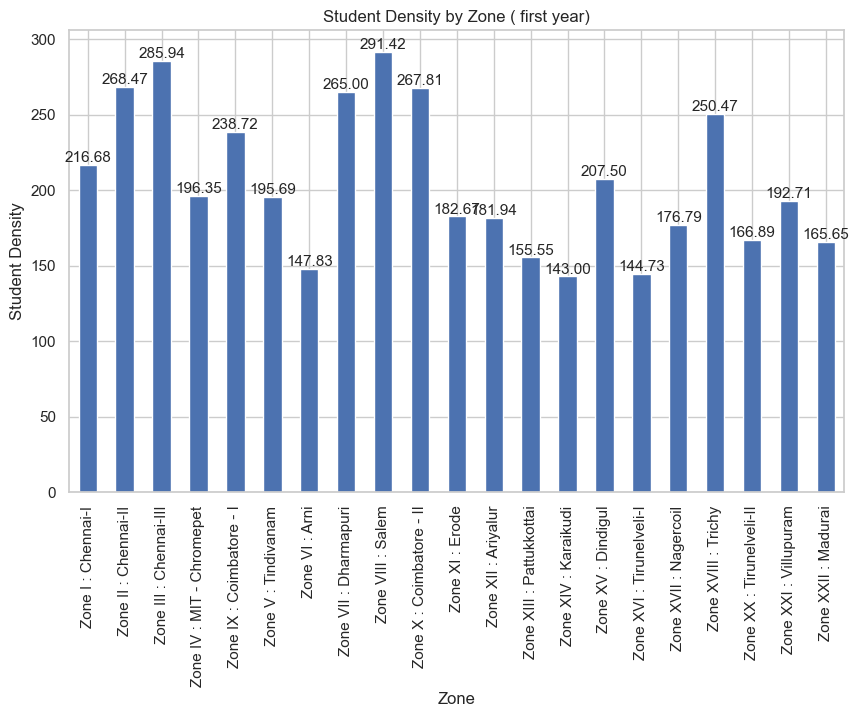

In [138]:

one_c_data = data.groupby('Zone').agg({'College Name': 'nunique', 'Total No of students': 'sum', '1st year': 'sum'})

# Compute the maximum and minimum number of colleges and students
max_colleges = one_c_data['College Name'].idxmax()
max_students = one_c_data['Total No of students'].max()
max_students_zone = one_c_data.loc[one_c_data['Total No of students'] == max_students].index[0]
max_students_1st = one_c_data['1st year'].loc[max_students_zone]
min_colleges = one_c_data['College Name'].idxmin()
min_students = one_c_data['Total No of students'].min()
min_students_zone = one_c_data.loc[one_c_data['Total No of students'] == min_students].index[0]
min_students_1st = one_c_data['1st year'].loc[min_students_zone]

# Compute the average number of colleges across zones
avg_colleges = one_c_data['College Name'].mean()
avg=avg_colleges.round(2)

# Print the results
print("\033[1mMaximum and minimum stats\033[0m")
#print(f"Zone with maximum number of colleges: {max_colleges} ({one_c_data['College Name'].max()})")
#print(f"Zone with maximum number of students: {max_students_zone} ({max_students})")
#print(f"Zone with maximum number 1st year of students: {max_students_zone} ({max_students_1st})")
#print(f"Zone with minimum number of colleges: {min_colleges} ({one_c_data['College Name'].min()})")
#print(f"Zone with minimum number of students: {min_students_zone} ({min_students})")
#print(f"Zone with minimum number of 1st year students:{min_students_zone} ({min_students_1st})")
#print(f"Average number of colleges across zones: {avg}")


# Store the statistics in a list of lists
stats = [
    ['Zone with maximum number of colleges', max_colleges, one_c_data['College Name'].max()],
    ['Zone with maximum number of students', max_students_zone, max_students],
    ['Zone with maximum number of 1st year students', max_students_zone, max_students_1st],
    ['Zone with minimum number of colleges', min_colleges, one_c_data['College Name'].min()],
    ['Zone with minimum number of students', min_students_zone, min_students],
    ['Zone with minimum number of 1st year students', min_students_zone, min_students_1st],
    ['Average number of colleges across zones', '', avg_colleges.round(2)]
]

# Print the table
print(tabulate(stats, headers=['Statistic', 'Zone', 'Value'], tablefmt='orgtbl'))



one_d_data = one_c_data['1st year'] / one_c_data['College Name']
print("\033[1mStudent density by zone\n\033[0m")
print(one_d_data.round(2))

# Display student density as a bar chart
ax = one_d_data.plot(kind='bar', figsize=(10,6))
plt.xlabel('Zone')
plt.ylabel('Student Density')
plt.title('Student Density by Zone ( first year)')

for i, bar in enumerate(ax.containers):
    ax.bar_label(bar, label_type='edge', labels=[f"{val:.2f}" for val in one_d_data], fontsize=11)

plt.show()



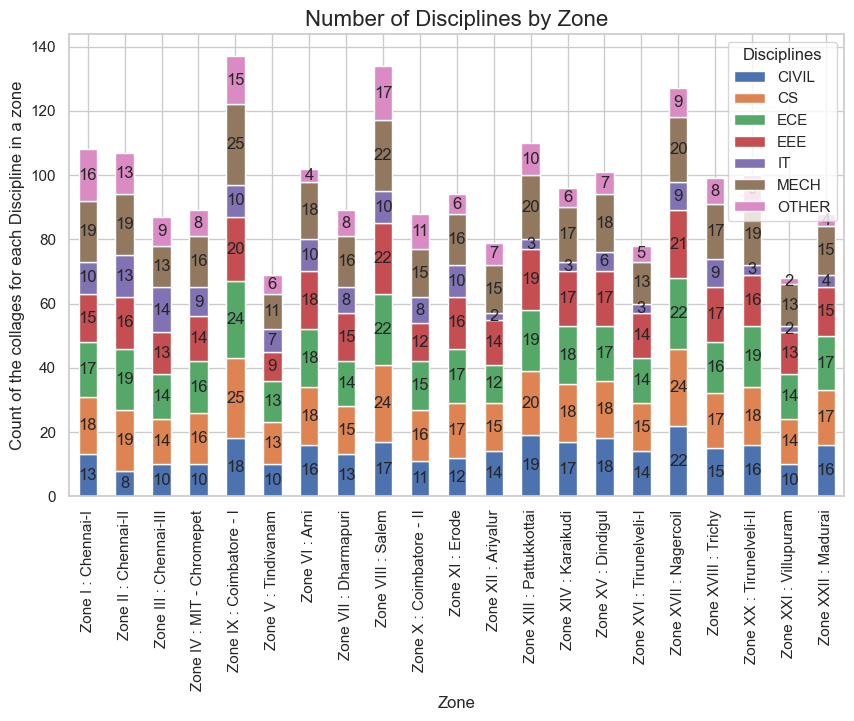

In [139]:
one_b_dat = data.groupby(['College Name','Zone','Disciplines']).agg({'1st year':'sum'}).reset_index() 
one_b_data = one_b_dat.groupby(['Zone', 'Disciplines']).size().reset_index(name='count')
pivoted = one_b_data.pivot(index='Zone', columns='Disciplines', values='count').fillna(0)
ax = pivoted.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_xlabel('Zone')
ax.set_ylabel('Count of the collages for each Discipline in a zone')
ax.set_title('Number of Disciplines by Zone', fontsize = 16)


for i, patch in enumerate(ax.patches):
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_y() + patch.get_height() / 2
    count = int(patch.get_height())
    ax.text(x, y, count, ha='center', va='center')

plt.show()